# Image Augmentation

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [3]:
test_datagen = ImageDataGenerator(rescale=1/255)

In [4]:
x_train = train_datagen.flow_from_directory(r'E:\vitExternship\DataSet\RPS_Dataset\Training',target_size=(64,64),
                                           class_mode='categorical',batch_size=100)

Found 2520 images belonging to 3 classes.


In [5]:
len(x_train)

26

In [6]:
x_test = train_datagen.flow_from_directory(r'E:\vitExternship\DataSet\RPS_Dataset\Testing',target_size=(64,64),
                                           class_mode='categorical',batch_size=100)

Found 372 images belonging to 3 classes.


In [7]:
x_train.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

# Importing Necessary Libraries

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

# Creating a Model

In [9]:
model = Sequential()

# Adding Layers

In [10]:
#Convulation Layer
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

In [11]:
#Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
#Flattening Layer
model.add(Flatten())

In [13]:
#Hidden Layer1
model.add(Dense(300,activation='relu'))

In [14]:
#Hidden Layer2
model.add(Dense(300,activation='relu'))

In [15]:
#Output Layer
model.add(Dense(3,activation='softmax'))

# Compiling the model

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Fitting the model

In [17]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

C:\Users\santh\AppData\Local\Temp/ipykernel_2988/234118701.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))


Epoch 1/10
26/26 [==============================] - 13s 493ms/step - loss: 1.3205 - accuracy: 0.4099 - val_loss: 1.0059 - val_accuracy: 0.4677
Epoch 2/10
26/26 [==============================] - 12s 448ms/step - loss: 0.6244 - accuracy: 0.8024 - val_loss: 0.6927 - val_accuracy: 0.6935
Epoch 3/10
26/26 [==============================] - 12s 463ms/step - loss: 0.2560 - accuracy: 0.9393 - val_loss: 0.6111 - val_accuracy: 0.7339
Epoch 4/10
26/26 [==============================] - 12s 443ms/step - loss: 0.1434 - accuracy: 0.9591 - val_loss: 0.5085 - val_accuracy: 0.7903
Epoch 5/10
26/26 [==============================] - 12s 445ms/step - loss: 0.0880 - accuracy: 0.9782 - val_loss: 0.5467 - val_accuracy: 0.7823
Epoch 6/10
26/26 [==============================] - 12s 442ms/step - loss: 0.0703 - accuracy: 0.9817 - val_loss: 0.5556 - val_accuracy: 0.7957
Epoch 7/10
26/26 [==============================] - 12s 448ms/step - loss: 0.0550 - accuracy: 0.9849 - val_loss: 0.9709 - val_accuracy: 0.6882

# Save the Model

In [18]:
model.save('RPS.h5')

# Testing the model

In [19]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [20]:
model = load_model('RPS.h5')
img = image.load_img(r'E:\vitExternship\DataSet\RPS_Dataset\Testing\scissors\testscissors01-07.png',target_size=(64,64))

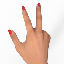

In [21]:
img

In [22]:
x=image.img_to_array(img)

In [23]:
x

array([[[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [252., 252., 252.],
        [252., 252., 252.],
        [253., 253., 253.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [252., 252., 252.],
        [252., 252., 252.],
        [251., 251., 251.]],

       [[254., 254., 254.],
        [253., 253., 253.],
        [254., 254., 254.],
        ...,
        [252., 252., 252.],
        [251., 251., 251.],
        [251., 251., 251.]],

       ...,

       [[251., 251., 251.],
        [250., 250., 250.],
        [250., 250., 250.],
        ...,
        [249., 249., 249.],
        [249., 249., 249.],
        [249., 249., 249.]],

       [[251., 251., 251.],
        [249., 249., 249.],
        [251., 251., 251.],
        ...,
        [250., 250., 250.],
        [250., 250., 250.],
        [249., 249., 249.]],

       [[250., 250., 250.],
        [251., 251., 251.],
        [251., 2

In [24]:
x.ndim

3

In [25]:
x=np.expand_dims(x,axis=0)

In [26]:
x.ndim

4

In [27]:
pred = np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 74ms/step


In [28]:
pred

array([2], dtype=int64)

In [29]:
index = ["Paper","Rock","Scissors"]

In [30]:
print(index[pred[0]])

Scissors


# CNN video Analysis

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model('RPS.h5')
video = cv2.VideoCapture(0)
index = ["Paper","Rock","Scissors"]
while 1:
    success,frame=video.read()
    cv2.imwrite('RPS.jpg',frame)
    img=image.load_img('RPS.jpg',target_size=(64,64))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    pred=np.argmax(model.predict(x),axis=1)
    y=pred[0]
    cv2.putText(frame,'The Predicted Symbol is: '+str(index[y]),(100,100),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),4)
    cv2.imshow('image',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows()

# End of the Assignment